In [1]:
#  Importing required package

import pandas as pd
import numpy as np

In [2]:
# Loading the processed dataset from experiment A


x_train= pd.read_csv('../data/processed/x_train_experiment_A.csv')
x_val=pd.read_csv('../data/processed/x_val_experiment_A.csv')
y_train=pd.read_csv('../data/processed/y_train_experiment_A.csv')
y_val=pd.read_csv('../data/processed/y_val_experiment_A.csv')


x_full=pd.read_csv('../data/processed/x_full_train_experiment_A.csv')
y_full=pd.read_csv('../data/processed/y_full_train_experiment_A.csv')


In [3]:
# !git add .
# !git commit -m "Starting experiment B, loading processed data from experiment A"
# !git push

In [4]:
y_full.head()

,drafted
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [5]:
# Using gridsearch to find best combination of hyperparameter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [5,10,50, 100, 200],
    'max_depth': [None,5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create a RandomForestClassifier instance
rf_classifier = RandomForestClassifier(random_state=42)


# Convert the single-column DataFrame to a 1D array

array = y_full['drafted'].to_numpy()  

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='recall')

# Fit the GridSearchCV object to the training data
# grid_search.fit(x_full, array)

# Print the best parameters found
# print("Best parameters:", grid_search.best_params_)


# Comment out grid search because the parameter 

In [6]:
# The model using hyperparameter provided by gridsearch is not helpful enough to fix the overfitting issue from experiment A



# Initiating the model with the hyperparameter obtained from gridsearch

rf_classifier_B = RandomForestClassifier(random_state=42,
                                         n_estimators=700, 
                                         max_depth=5, 
                                         min_samples_split=50)



In [7]:
# Fitting the rf_classifier_B


rf_classifier_B.fit(x_train, y_train)
predictions_train = rf_classifier_B.predict(x_train)


# Classification report for training with undersampling

from sklearn.metrics import recall_score, classification_report , accuracy_score

report_train= classification_report(y_train, predictions_train)
print(report_train)




/var/folders/w6/skyqkqrx1_q7pbxvh4_c7g_00000gn/T/ipykernel_49749/3281028461.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier_B.fit(x_train, y_train)


              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      1028
         1.0       0.90      0.95      0.92       441

    accuracy                           0.95      1469
   macro avg       0.94      0.95      0.94      1469
weighted avg       0.95      0.95      0.95      1469



In [8]:
# Import dump from joblib

from joblib import dump

dump (rf_classifier_B,'../models/rf_experiment_B.joblib')



['../models/rf_experiment_B.joblib']

In [9]:
# predicting the validation data

predictions_val = rf_classifier_B.predict(x_val)


report_train= classification_report(y_val, predictions_val)
print(report_train)


              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       115
         1.0       0.94      0.94      0.94        49

    accuracy                           0.96       164
   macro avg       0.96      0.96      0.96       164
weighted avg       0.96      0.96      0.96       164



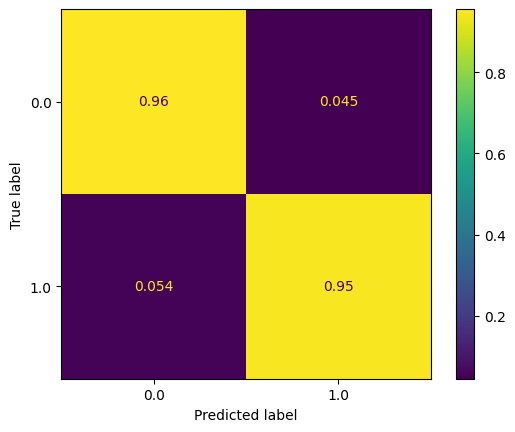

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix for training
ConfusionMatrixDisplay.from_estimator(rf_classifier_B, x_train, y_train, normalize='true')

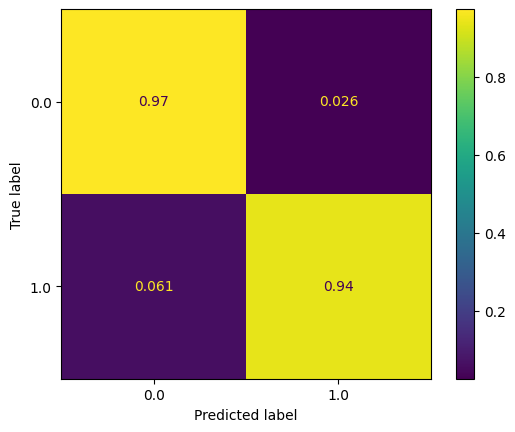

In [10]:
# Confusion matrix for validation
ConfusionMatrixDisplay.from_estimator(rf_classifier_B, x_val, y_val, normalize='true')

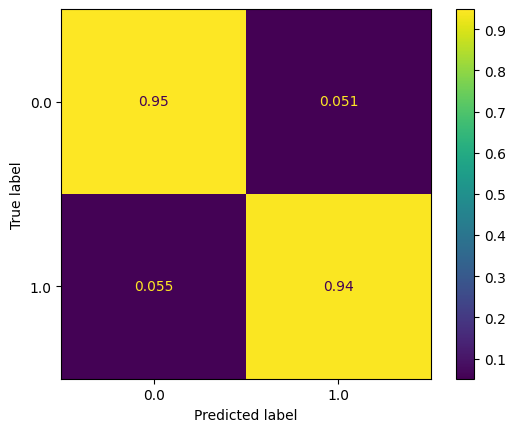

In [11]:
# Confusion matrix for full data train
ConfusionMatrixDisplay.from_estimator(rf_classifier_B, x_full, y_full, normalize='true')

In [12]:
# Getting the ROC score for training


from sklearn.metrics import roc_auc_score

proba_predictions = rf_classifier_B.predict_proba(x_train)

roc_auc = roc_auc_score(y_train, proba_predictions[:, 1])

roc_auc

0.9889841799235907

In [13]:
# Getting the ROC score for val

proba_predictions = rf_classifier_B.predict_proba(x_val)

roc_auc = roc_auc_score(y_val, proba_predictions[:, 1])

roc_auc

0.9866903283052352

In [14]:
test_dataset=pd.read_csv('../data/raw/test.csv')

x_test_processed=pd.read_csv('../data/processed/experiment_A_test_x.csv')

In [15]:
prediction_test= rf_classifier_B.predict(x_test_processed)

proba_predictions_test = rf_classifier_B.predict_proba(x_test_processed)


player_id=test_dataset['player_id']

# Converting series to dataframe
test_prediction = pd.DataFrame({'player_id': player_id})

# Adding the probability
test_prediction['drafted']=proba_predictions_test[:,1]

In [16]:
test_prediction.to_csv('../data/processed/experiment_B_prediction.csv', index=False)

In [18]:
# !git add .
# !git commit -m "End of experiment B, upload csv for submitting to kaggle"
# !git push

[master 7a04cd0] End of experiment B, upload csv for submitting to kaggle
 Committer: Daniel Alexander <danielalexander@Daniels-Mac-mini.local>
Your name and email address were configured automatically based
on your username and hostname. Please check that they are accurate.
You can suppress this message by setting them explicitly. Run the
following command and follow the instructions in your editor to edit
your configuration file:

    git config --global --edit

After doing this, you may fix the identity used for this commit with:

    git commit --amend --reset-author

 1 file changed, 36 insertions(+), 129 deletions(-)
 rename notebooks/{Experiment B.ipynb => Experiment_B.ipynb} (93%)
Enumerating objects: 6, done.
Counting objects: 100% (6/6), done.
Delta compression using up to 8 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 45.84 KiB | 9.17 MiB/s, done.
Total 4 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), complet